In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
pd.options.display.float_format = '{:}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#load data 
df1 = pd.DataFrame(pd.read_excel("/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/Data/ny_crime_2013.xls", skiprows = 4))
df2 = pd.DataFrame(pd.read_excel("/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/Data/ny_crime_2014.xls", skiprows = 4))

df1.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,nan,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,nan,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,nan,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,nan,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,nan
4,Albion Village,6388.0,23.0,0.0,nan,3.0,4.0,16.0,223.0,53.0,165.0,5.0,nan


In [45]:

def clean_df(df1):
    df1_clean = df1.rename(columns={ df1.columns[2]: "violent_crime",df1.columns[3]: "murder",
                        df1.columns[4]: "rape",df1.columns[5]: "rape2",
                        df1.columns[7]: "A_assault",df1.columns[8]: "property_crime",
                        df1.columns[10]: "larceny_theft",df1.columns[11]: "motor_theft"})
    columns_to_drop = { "rape", "A_assault", "Arson3"}
    return df1_clean.drop(columns_to_drop, axis =1).dropna()

df1_clean = clean_df(df1)
df2_clean = clean_df(df2)

df1_clean.head(1)

,City,Population,violent_crime,murder,rape2,Robbery,property_crime,Burglary,larceny_theft,motor_theft
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0


In [43]:
df1_clean["total_crime"] = df1_clean["violent_crime"] + df1_clean["property_crime"]
df1_clean["exp_pop"] = (df1_clean["Population"]/526).apply(np.exp)
df1_clean["sqrt_pop"] = df1_clean["Population"].apply(np.sqrt)
df1_clean["pop2"] = df1_clean["Population"] **2
df1_clean = df1_clean.fillna(0)

In [47]:
df1_clean["City"].unique()

array(['Adams Village', 'Addison Town and Village', 'Akron Village',
       'Albany', 'Albion Village', 'Alfred Village', 'Allegany Village',
       'Amherst Town', 'Amityville Village', 'Amsterdam',
       'Arcade Village', 'Ardsley Village', 'Asharoken Village',
       'Attica Village', 'Auburn', 'Avon Village',
       'Baldwinsville Village', 'Ballston Spa Village', 'Batavia',
       'Bath Village', 'Bedford Town', 'Bethlehem Town', 'Binghamton',
       'Black River', 'Blooming Grove Town', 'Bolivar Village',
       'Bolton Town', 'Boonville Village', 'Brant Town', 'Brewster',
       'Briarcliff Manor Village', 'Brighton Town', 'Brockport Village',
       'Bronxville Village', 'Brownville Village', 'Buffalo',
       'Cairo Town', 'Cambridge Village', 'Camden Village',
       'Camillus Town and Village', 'Canandaigua', 'Canastota Village',
       'Canisteo Village', 'Canton Village', 'Cape Vincent Village',
       'Carmel Town', 'Carroll Town', 'Carthage Village',
       'Cattaraugus

In [42]:
df1_clean["Population"].describe()

count               348.0
mean    40037.63218390805
std     450037.3675209857
min                 526.0
25%                3003.0
50%                7233.5
75%               18427.5
max             8396126.0
Name: Population, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


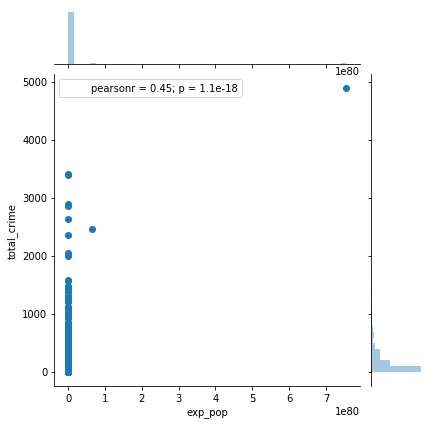

In [44]:
#sns.distplot(df1_clean["total_crime"], df1_clean["Population"])
sns.jointplot(x="exp_pop", y="total_crime", data=df1_clean[df1_clean["Population"] < 100000].dropna());

In [ ]:
lm = smf.ols(formula = "total_crime ~", data = df1_no_zeros).fit()
print(lm.params)
print("\n\nP values:\n", lm.pvalues)
print("\n\nr_squard:\n", lm.rsquared)

In [50]:
regr = linear_model.LinearRegression()
x1 = ["Population"]
# Fit our model to our data.
regr.fit(df1_clean[x1], df1_clean["property_crime"])

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, df1_clean[x1], df1_clean["property_crime"],  cv=10)
r_scores = np.sqrt(scores)

def display_scores(scores):
    print("\n\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores)

Coefficients: 
 [0.01695663]
Intercept: 
 113.70298212789032


Scores: [ 0.65820789  0.57221307  0.25187697  0.76853964  0.64827261  0.62199386
 -0.0816426   0.55992872  0.59367216  0.65374456]
Mean: 0.5246806879658107
Standard deviation: 0.2385393839977479


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


In [5]:
def log_columns(df, c_list):
    for c in c_list:
        df["log_"+c+"_cap"] = ((100*df[c]/df["Population"])+1).apply(np.log)
    df["log_Population"] = df["Population"].apply(np.log)
        
c_to_log = ("property_crime","murder","rape2", "Robbery", "Burglary", "larceny_theft", "motor_theft", "violent_crime")

log_columns(df1_clean, c_to_log)
log_columns(df2_clean, c_to_log)
df2_clean.head(10)

,Population,violent_crime,murder,rape2,Robbery,property_crime,Burglary,larceny_theft,motor_theft,log_property_crime_cap,log_murder_cap,log_rape2_cap,log_Robbery_cap,log_Burglary_cap,log_larceny_theft_cap,log_motor_theft_cap,log_violent_crime_cap,log_Population
0,1851.0,0.0,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.4664180623694419,0.0,0.0,0.0,0.052616028049613725,0.43194377633917447,0.0,0.0,7.523481312573497
1,2568.0,2.0,0.0,0.0,1.0,49.0,1.0,47.0,1.0,1.0674998398517614,0.0,0.0,0.03820174222566249,0.03820174222566249,1.04035376470621,0.03820174222566249,0.0749976519277083,7.850882664809852
3,2842.0,1.0,0.0,0.0,0.0,17.0,0.0,17.0,0.0,0.4688594140084578,0.0,0.0,0.0,0.0,0.4688594140084578,0.0,0.034581592504336775,7.952263308657046
11,9509.0,12.0,0.0,0.0,11.0,198.0,10.0,175.0,13.0,1.1256559175350123,0.0,0.0,0.10946397891982731,0.0999933143261522,1.0439314252371423,0.12814040187675865,0.11884579086143088,9.159993997539445
12,18099.0,27.0,0.0,0.0,15.0,490.0,107.0,370.0,13.0,1.3103124526101917,0.0,0.0,0.07962185639998869,0.46448397619011333,1.1132748790471159,0.0693648302222346,0.13904822050172874,9.803611967108871
14,2030.0,0.0,0.0,0.0,0.0,25.0,7.0,18.0,0.0,0.8026861464412467,0.0,0.0,0.0,0.29626581614317243,0.6348290101388586,0.0,0.0,7.615791072035833
15,4561.0,1.0,0.0,0.0,0.0,25.0,6.0,19.0,0.0,0.4370447868046464,0.0,0.0,0.0,0.12358846143702668,0.34824220684646506,0.0,0.021688119661040502,8.4252971767117
16,656.0,0.0,0.0,0.0,0.0,6.0,0.0,4.0,2.0,0.6495265580840549,0.0,0.0,0.0,0.0,0.4760826753221178,0.2661095871976531,0.0,6.486160788944089
17,2502.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.39178280210658645,0.0,0.0,0.0,0.0,0.39178280210658645,0.0,0.0,7.824845691026856
27,1392.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.19516969927180358,0.0,0.0,0.0,0.06937593986934125,0.13424952550996347,0.0,0.0,7.238496840894365


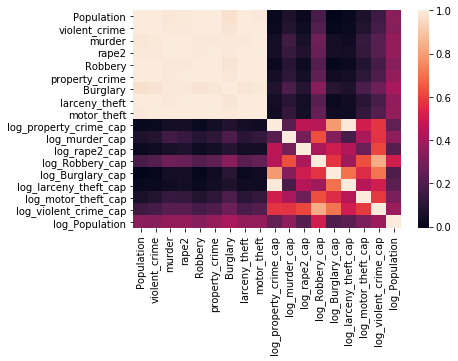

In [6]:
sns.heatmap(df1_clean.corr())

In [7]:
df1_clean["int_rap_rob"] = df1_clean["log_Robbery_cap"] * df1_clean["log_rape2_cap"]
df1_clean["sqr_log_violent_crime_cap"] = df1_clean["log_violent_crime_cap"] **2
df2_clean["int_rap_rob"] = df2_clean["log_Robbery_cap"] * df2_clean["log_rape2_cap"]
df2_clean["sqr_log_violent_crime_cap"] = df2_clean["log_violent_crime_cap"] **2

In [19]:
y = "log_property_crime_cap"
x = "log_violent_crime_cap+sqr_log_violent_crime_cap"

linear_formula = y + " ~ " + x

lm = smf.ols(formula = linear_formula, data = df1_no_zeros).fit()
print(lm.params)
print("\n\nP values:\n", lm.pvalues)
print("\n\nr_squard:\n", lm.rsquared)

Intercept                   0.6816141707983382
log_violent_crime_cap        3.301695191730687
sqr_log_violent_crime_cap    -2.85658634492444
dtype: float64


P values:
 Intercept                    2.039413575505069e-47
log_violent_crime_cap       1.3608247849436417e-17
sqr_log_violent_crime_cap    1.575949558179062e-07
dtype: float64


r_squard:
 0.3495418102164921


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' k

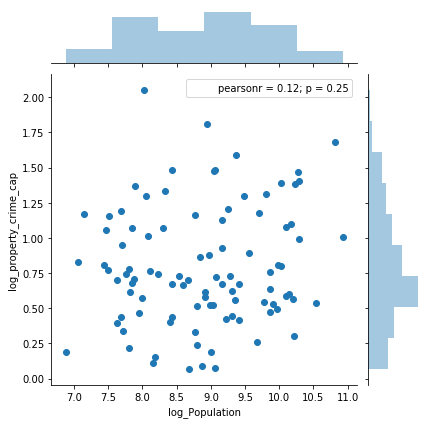

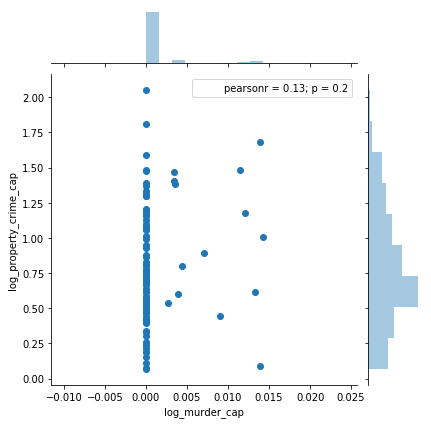

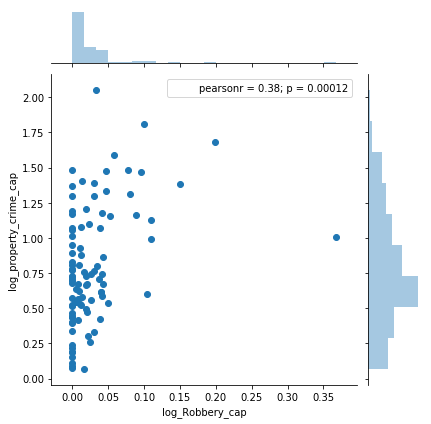

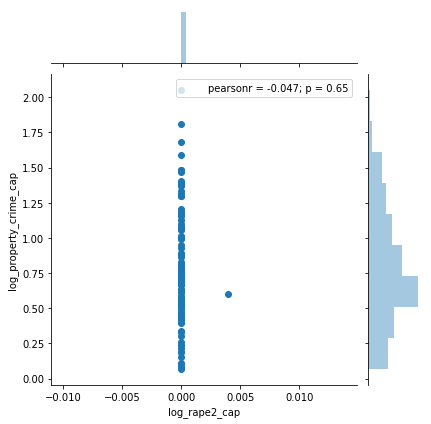

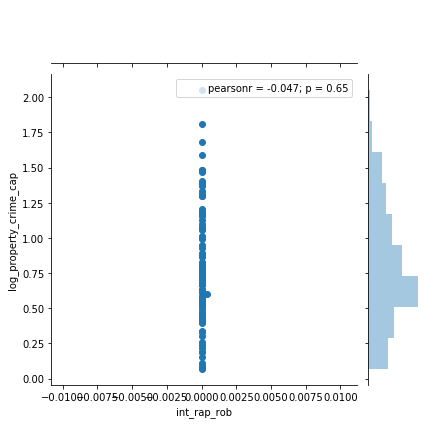

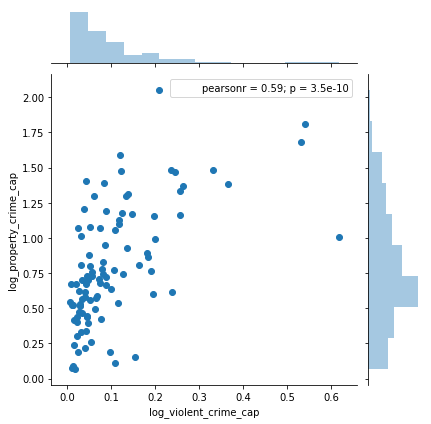

In [20]:
y = "log_property_crime_cap"
x1 = ["log_Population","log_murder_cap","log_Robbery_cap", "log_rape2_cap", "int_rap_rob", "log_violent_crime_cap"]

for x in x1:
    sns.jointplot(x=x, y=y, data=df2_no_zeros);

In [21]:
regr = linear_model.LinearRegression()
x1 = ["log_violent_crime_cap","sqr_log_violent_crime_cap"]
# Fit our model to our data.
regr.fit(df1_no_zeros[x1], df1_no_zeros[y])

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, df1_no_zeros[x1], df1_no_zeros[y],  cv=10)
r_scores = np.sqrt(scores)

def display_scores(scores):
    print("\n\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores)

Coefficients: 
 [ 3.30169519 -2.85658634]
Intercept: 
 0.6816141707983369


Scores: [0.45387616 0.16720879 0.37226894 0.09404501 0.45755405 0.29905739
 0.28650926 0.33790832 0.4738558  0.05812588]
Mean: 0.3000409585030961
Standard deviation: 0.14287188397517414


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [22]:
lm1 = smf.ols(formula = linear_formula, data = df2_no_zeros).fit()
print(lm1.params)
print("\n\nP values:\n", lm1.pvalues)
print("\n\nr_squard:\n", lm1.rsquared)

Intercept                   0.42512499516741753
log_violent_crime_cap         4.643721562311914
sqr_log_violent_crime_cap    -5.049886380301045
dtype: float64


P values:
 Intercept                   9.062915556630721e-10
log_violent_crime_cap       8.704174284723754e-08
sqr_log_violent_crime_cap    0.001386759959894147
dtype: float64


r_squard:
 0.41231282520407486


In [23]:
len(df1_clean)

348

In [24]:
regr1 = linear_model.LinearRegression()
x1 = ["log_violent_crime_cap","sqr_log_violent_crime_cap"]
# Fit our model to our data.
regr1.fit(df2_no_zeros[x1], df2_no_zeros[y])

# Display the attributes we calculated.
print('Coefficients: \n', regr1.coef_)
print('Intercept: \n', regr1.intercept_)

from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(regr, df2_no_zeros[x1], df2_no_zeros[y],  cv=5)
r_scores = np.sqrt(scores)

def display_scores(scores):
    print("\n\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores1)

Coefficients: 
 [ 4.64372156 -5.04988638]
Intercept: 
 0.42512499516741775


Scores: [0.10750978 0.30868956 0.40890821 0.34311013 0.47107845]
Mean: 0.3278592264509052
Standard deviation: 0.12347844392453784


In [17]:
df1_no_zeros = df1_clean.ix[(df1_clean['log_violent_crime_cap'] != 0) & (df1_clean['log_property_crime_cap'] != 0)]
df2_no_zeros = df2_clean.ix[(df2_clean['log_violent_crime_cap'] != 0) & (df2_clean['log_property_crime_cap'] != 0)]


In [25]:
from sklearn.cross_decomposition import PLSRegression

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(df1_clean[x1], df1_clean[y])

# Save predicted values.
Y_PLS_pred = pls1.predict(df1_clean[x1])
print('R-squared PLSR:', pls1.score(df1_clean[x1], df1_clean[y]))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

ValueError: Invalid number of components: 3

In [ ]:
#sns.heatmap(df2_clean.corr())